In [4]:
!pip install --upgrade matplotlib

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

import re
from nltk.corpus import stopwords
import string

import keras
import tensorflow as tf
from keras.utis.vis_utils import Tokenizer
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam

import pickle
import re

ModuleNotFoundError: No module named 'tensorflow.compat'

In [6]:
# def load_data(filename):
#     file=open(filename,'r')
#     text=file.read()
#     file.close()
#     return text
# data=load_data("got1.txt") 

def load_data(filename):
    # Provide the full path to the file
    full_path = r'C:\Users\Hp\got1.txt'
    
    try:
        with open(full_path, 'r') as file:
            text = file.read()
        return text
    except FileNotFoundError:
        print("File not found.")
        return None

data = load_data("got1.txt")

In [7]:
data[:1000]

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

# Prepare Corpus

In [8]:
import re
import string
def clean_text(text):
    sample=text
    sample=re.sub('[%s]'%re.escape(string.punctuation),'',sample)
    sample=[word for word in sample.split() if word.isalpha()]
    sample=[word.lower() for word in sample]
    sample=" ".join(sample)
    
    return sample

In [9]:
cleaned_data=clean_text(data)

In [10]:
!pip install --upgrade matplotlib stack-data

In [11]:
data[:100]

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should '

<BarContainer object of 2 artists>

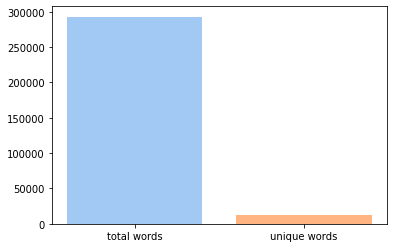

In [12]:
import matplotlib.pyplot as plt
plt.bar(x=["total words","unique words"],
        height=[len(cleaned_data.split()),len(set(cleaned_data.split()))],
        color=sns.color_palette('pastel'))

In [13]:
print('total tokens: %d' % len(cleaned_data.split()))
print('unique tokens: %d' % len(set(cleaned_data.split())))

total tokens: 292883
unique tokens: 11923


In [14]:
sequences_doc=[]
seq_len=50
l=seq_len+1
tokens=[w for w in cleaned_data.split()]
for i in range(l,len(tokens)):
    seq=tokens[i-l:i]
    line=' '.join(seq)
    sequences_doc.append(line)

In [15]:
sequences_doc

['a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint',
 'game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of',
 'of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of a',
 'thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hi

In [16]:
# !pip install --upgrade tensorflow keras numpy

In [17]:
# !pip install numpy==1.22.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\anaconda3\\Lib\\site-packages\\~5mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.22.0-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
# !pip install tensorflow==2.6.0

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# !pip install --upgrade numpy

In [ ]:
# !pip install tensorflow

In [ ]:
# from keras.utis.vis_utils import Tokenizer

In [ ]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(sequences_doc)
# sequences = tokenizer.texts_to_sequences(sequences_doc)
# vocab_size=len(tokenizer.word_index)+1

In [ ]:
!pip install tokenizers transformers

In [ ]:
from transformers import AutoTokenizer

In [ ]:

tokenizer = AutoTokenizer.from_pretrained(sequences_doc)
tokens = tokenizer.tokenize(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)
vocab_size=len(tokens.word_index)+1

In [ ]:
sequences=np.array(sequences)
X,y=sequences[:,:-1],sequences[:,-1]
y=to_categorical(y,num_classes=vocab_size)

seq_length=X.shape[1]
print(seq_length)

# Prepare the Model


In [ ]:
def define_model(vocab_size,seq_length):
    model=Sequential()
    model.add(Embedding(vocab_size,50,input_length))
    model.add(LSTM(100,return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(vocab_size,activation='softmax'))
    
    #compile network
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #summarize defined model
    model.summary()
    return model

In [ ]:
model=define_model(vocab_size,seq_length)

In [ ]:
model.fit(X,y,batch_size=128,epochs=10)

In [ ]:
model.save('text_gen_model.h5')
#save the tokenizer
pickle.dump(tokenizer,open('tokenizer_text_gen.pkl','wb'))

# Generate Text Sequence

In [ ]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
    # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(yhat,axis=1)
        print(yhat)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [ ]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)

In [ ]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

In [ ]:
pd.read_csv("twitter_parsed_dataset.csv")["Text"][np.random.randint(0, len(pd.read_csv("twitter_parsed_dataset.csv")))]

In [ ]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]